In [267]:
# Data processing
# ==============================================================================
import numpy as np
import pandas as pd

# Plots
# ==============================================================================
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import seaborn as sns
import hvplot

from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
plt.style.use('fivethirtyeight')

# Modelling and forecasting
# ==============================================================================

import matplotlib.pyplot as plt

from skforecast.ForecasterAutoreg import ForecasterAutoreg
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error

import itertools
import statsmodels.api as sm
import matplotlib
matplotlib.rcParams['axes.labelsize'] = 14
matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['ytick.labelsize'] = 12
matplotlib.rcParams['text.color'] = 'k'


import warnings
warnings.filterwarnings('ignore')

In [268]:
riceprice=requests.get("https://www.ec.europa.eu/agrifood/api/rice/prices?")
df_riceprice_rawdata=pd.DataFrame(riceprice.json())

df_riceprice=df_riceprice_rawdata.copy()
df_riceprice["price"]=df_riceprice["price"].str.replace("€","") # removing the € character in price column
df_riceprice["price"]=pd.to_numeric(df_riceprice["price"])   # changing price data into numeric data type
display(df_riceprice)
df_riceprice.to_csv('countrydata.csv')

,memberStateCode,memberStateName,beginDate,endDate,weekNumber,price,unit,marketingYear,stage,type,variety
0,IT,Italy,13/10/2008,19/10/2008,7,1010.0,Tonne,2008/2009,Milled,Japonica,Ariete
1,IT,Italy,12/01/2009,18/01/2009,20,940.0,Tonne,2008/2009,Milled,Japonica,Ariete
2,IT,Italy,18/02/2008,24/02/2008,25,635.0,Tonne,2007/2008,Milled,Japonica,Ariete
3,IT,Italy,07/07/2008,13/07/2008,45,1030.0,Tonne,2007/2008,Milled,Japonica,Ariete
4,IT,Italy,14/04/2008,20/04/2008,33,730.0,Tonne,2007/2008,Milled,Japonica,Ariete
...,...,...,...,...,...,...,...,...,...,...,...
19171,IT,Italy,19/03/2012,25/03/2012,30,620.0,Tonne,2011/2012,Milled,Japonica,Rond
19172,IT,Italy,30/07/2012,05/08/2012,49,610.0,Tonne,2011/2012,Milled,Japonica,Rond
19173,IT,Italy,25/06/2012,01/07/2012,44,590.0,Tonne,2011/2012,Milled,Japonica,Rond
19174,IT,Italy,17/09/2012,23/09/2012,3,610.0,Tonne,2012/2013,Milled,Japonica,Rond


In [269]:
italyrice_df=df_riceprice.query('memberStateName == "Italy"')
italyrice_df.to_csv('italyricedata.csv')
italyrice_df.drop(columns=['memberStateCode','endDate','weekNumber','marketingYear'],inplace=True)
italyrice_df.dropna()



,memberStateName,beginDate,price,unit,stage,type,variety
0,Italy,13/10/2008,1010.0,Tonne,Milled,Japonica,Ariete
1,Italy,12/01/2009,940.0,Tonne,Milled,Japonica,Ariete
2,Italy,18/02/2008,635.0,Tonne,Milled,Japonica,Ariete
3,Italy,07/07/2008,1030.0,Tonne,Milled,Japonica,Ariete
4,Italy,14/04/2008,730.0,Tonne,Milled,Japonica,Ariete
...,...,...,...,...,...,...,...
19171,Italy,19/03/2012,620.0,Tonne,Milled,Japonica,Rond
19172,Italy,30/07/2012,610.0,Tonne,Milled,Japonica,Rond
19173,Italy,25/06/2012,590.0,Tonne,Milled,Japonica,Rond
19174,Italy,17/09/2012,610.0,Tonne,Milled,Japonica,Rond


In [270]:
italyrice_df['beginDate']=pd.to_datetime(italyrice_df['beginDate'],format="%d/%m/%Y")#sets datetime format
italyrice_df.sort_values('beginDate',inplace=True)#sort by date ascending
display(italyrice_df.head(5)) 
meanpriceitalydf=italyrice_df.groupby([pd.Grouper(key='beginDate',freq='W'),'stage'])['price'].mean().reset_index()#variety and type not taken into consideration just stage of production
paddypriceitaly=meanpriceitalydf.query('stage == "Paddy"')#below block is just for paddy stage of rice
paddypriceitaly=paddypriceitaly.set_index('beginDate')
paddypriceitaly=paddypriceitaly.asfreq('1W')
paddypriceitaly=paddypriceitaly.sort_index()
paddypriceitaly


,memberStateName,beginDate,price,unit,stage,type,variety
15011,Italy,2000-09-25,278.89,Tonne,Paddy,Japonica,Lido
9770,Italy,2000-09-25,278.89,Tonne,Paddy,Japonica,Ariete
11925,Italy,2000-09-25,273.72,Tonne,Paddy,Indica,Thaibonnet
12455,Italy,2000-10-02,278.89,Tonne,Paddy,Japonica,Lido
11927,Italy,2000-10-02,273.72,Tonne,Paddy,Indica,Thaibonnet


,stage,price
beginDate,,
2000-10-01,Paddy,277.166667
2000-10-08,Paddy,278.886667
2000-10-15,Paddy,277.595000
2000-10-22,Paddy,282.760000
2000-10-29,Paddy,288.570000
...,...,...
2022-04-03,Paddy,498.770000
2022-04-10,Paddy,523.190000
2022-04-17,Paddy,541.345000


In [271]:
(paddypriceitaly.index == pd.date_range(
                    start = paddypriceitaly.index.min(),
                    end   = paddypriceitaly.index.max(),
                    freq  = paddypriceitaly.index.freq)).all()

print(f"Missing values: {paddypriceitaly.isnull().any(axis=1).sum()}")#checking for missing values, of which there are 220 weeks missing
paddypriceitaly.fillna(method='ffill', inplace=True)#ideally we use machine learning to fill in the missing values but for now missing weeks will have previous weeks data
print(f"Missing values: {paddypriceitaly.isnull().any(axis=1).sum()}")#now 0 missing


Missing values: 220
Missing values: 0


In [272]:
# Split data: train-validation-test

end_train = '2018-01-01'
end_validation = '2020-01-01'

data_train = paddypriceitaly.loc[: end_train, :]
data_val   = paddypriceitaly.loc[end_train:end_validation, :]
data_test  = paddypriceitaly.loc[end_validation:, :]

print(f"Training dates   : {data_train.index.min()} --- {data_train.index.max()}")
print(f"Validation dates : {data_val.index.min()} --- {data_val.index.max()}")
print(f"Test dates       : {data_test.index.min()} --- {data_test.index.max()}")

Training dates   : 2000-10-01 00:00:00 --- 2017-12-31 00:00:00
Validation dates : 2018-01-07 00:00:00 --- 2019-12-29 00:00:00
Test dates       : 2020-01-05 00:00:00 --- 2022-05-01 00:00:00


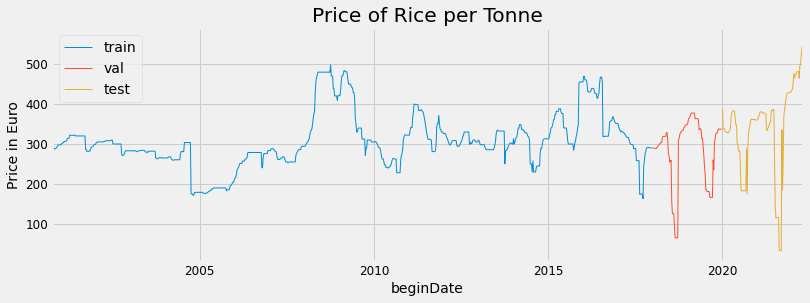

In [273]:
fig, ax = plt.subplots(figsize=(12, 4))
data_train.price.plot(ax=ax, label='train', linewidth=1)
data_val.price.plot(ax=ax, label='val', linewidth=1)
data_test.price.plot(ax=ax, label='test', linewidth=1)
ax.set_title('Price of Rice per Tonne')
ax.set_ylabel('Price in Euro')
ax.legend()


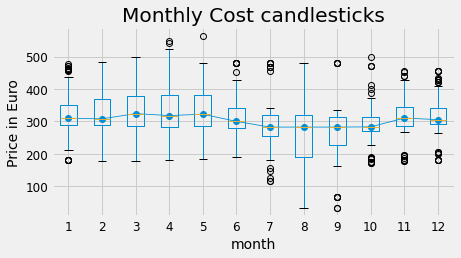

In [274]:
fig, ax = plt.subplots(figsize=(7, 3.5))
paddypriceitaly['month'] = paddypriceitaly.index.month
paddypriceitaly.boxplot(column='price', by='month', ax=ax,)
paddypriceitaly.groupby('month')['price'].median().plot(style='o-', linewidth=0.8, ax=ax)
ax.set_ylabel('Price in Euro')
ax.set_title('Monthly Cost candlesticks')
fig.suptitle('');#variations over 12 month period

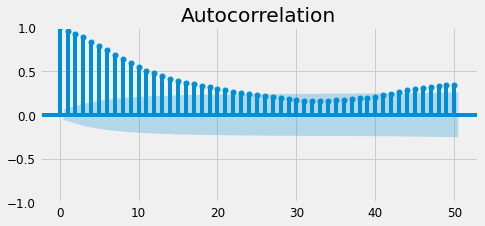

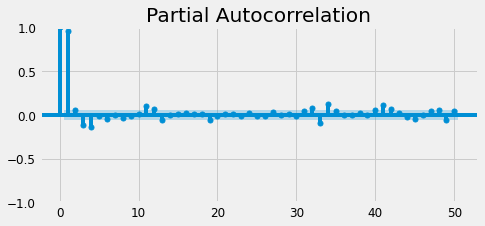

In [275]:
fig, ax = plt.subplots(figsize=(7, 3))
plot_acf(paddypriceitaly.price, ax=ax, lags=50)
plt.show()#the autocorrelation below suggests that current price of rice is based off of previous price

fig, ax = plt.subplots(figsize=(7, 3))
plot_pacf(paddypriceitaly.price, ax=ax, lags=50)
plt.show()

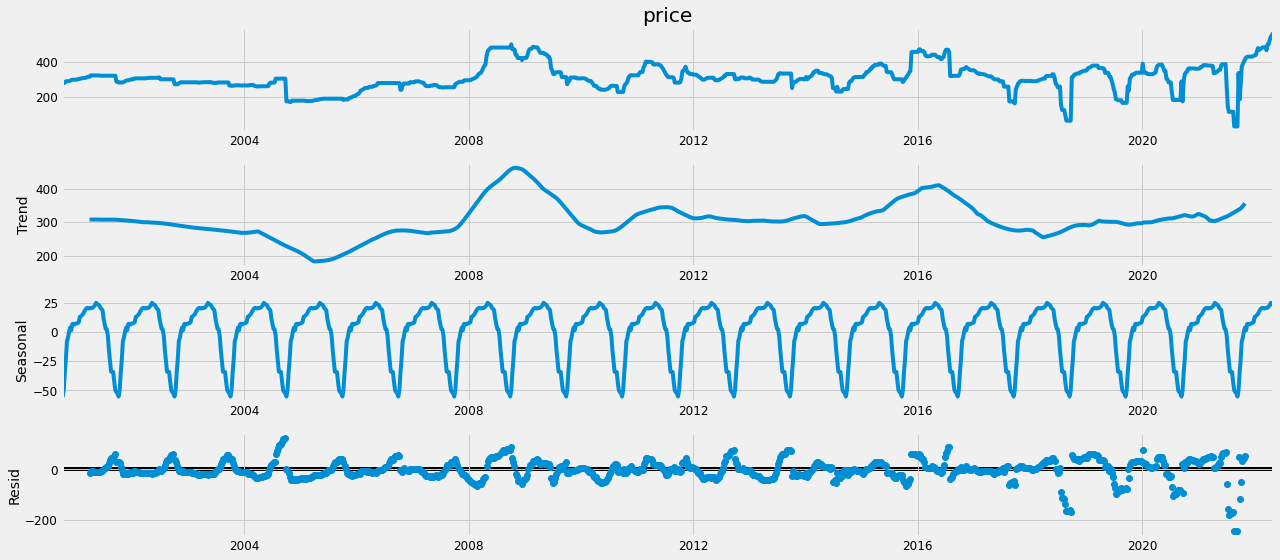

In [277]:
from pylab import rcParams
rcParams['figure.figsize'] = 18, 8
decomposition = sm.tsa.seasonal_decompose(paddypriceitaly.price, model='additive')
fig = decomposition.plot()
plt.show()

In [283]:
p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(paddypriceitaly.price,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            results = mod.fit()
            #print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:16171.5383013592
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:14908.13049390163
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:12799.112390278975
ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:12504.925691837783
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:12804.307135992422
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:12634.424958931435
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:12598.751854145386
ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:12442.900854459687
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:14708.554742900968
ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:13548.670229991389
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:11773.610004429123
ARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:11435.22730092175
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:11783.77729358614
ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:11554.853978546322
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:11566.577891798774
ARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:11382.270216736983
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:9922.13156310598
ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:9829.686061650133


In [284]:
mod = sm.tsa.statespace.SARIMAX(paddypriceitaly.price,
                                order=(1, 1, 1),
                                seasonal_order=(1, 1, 1, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results = mod.fit()
print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.3777      0.121     -3.120      0.002      -0.615      -0.140
ma.L1          0.2932      0.127      2.305      0.021       0.044       0.542
ar.S.L12       0.0010      0.024      0.041      0.967      -0.047       0.049
ma.S.L12      -0.9912      0.023    -43.664      0.000      -1.036      -0.947
sigma2       402.5838      6.000     67.097      0.000     390.824     414.344


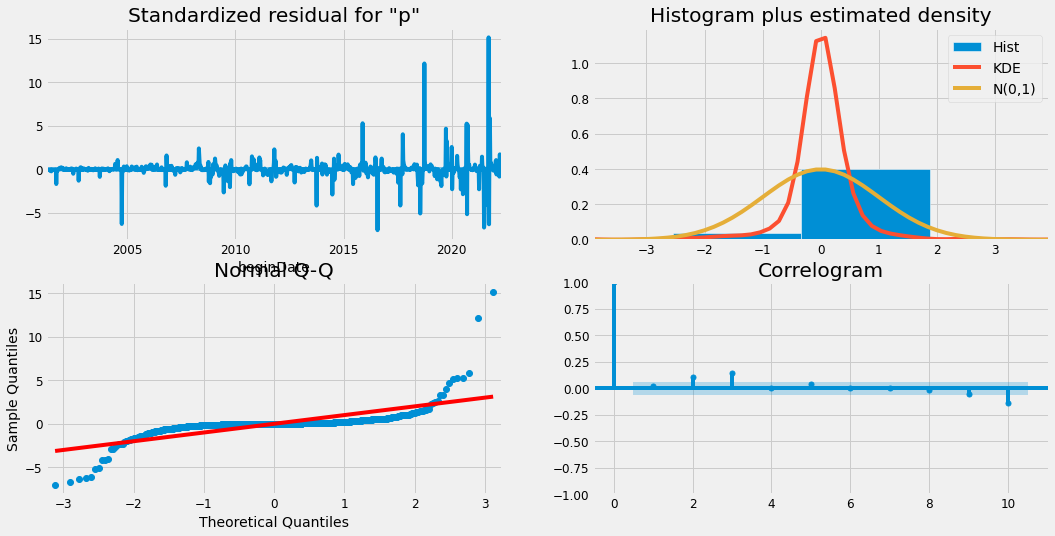

In [285]:
results.plot_diagnostics(figsize=(16, 8))
plt.show()

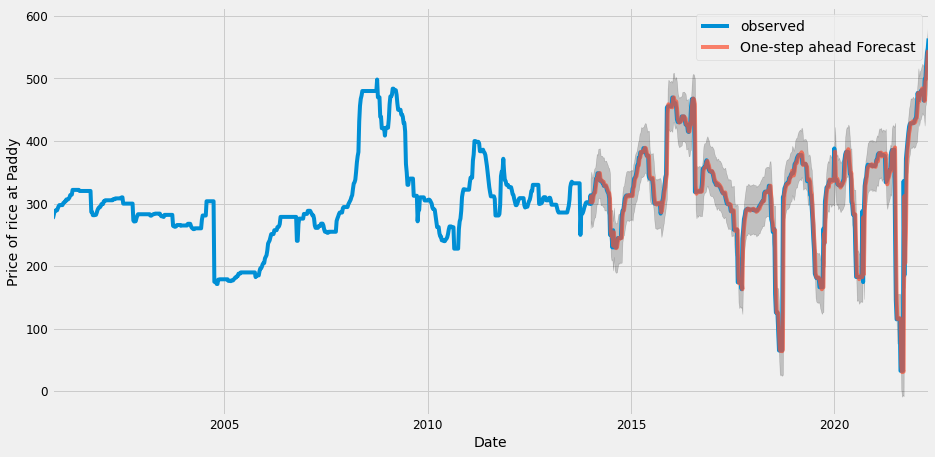

In [300]:
pred = results.get_prediction(start=pd.to_datetime('2014-1-5'), dynamic=False)
pred_ci = pred.conf_int()
ax = paddypriceitaly.price['2000-01-01':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(14, 7))
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)
ax.set_xlabel('Date')
ax.set_ylabel('Price of rice at Paddy')
plt.legend()
plt.show()

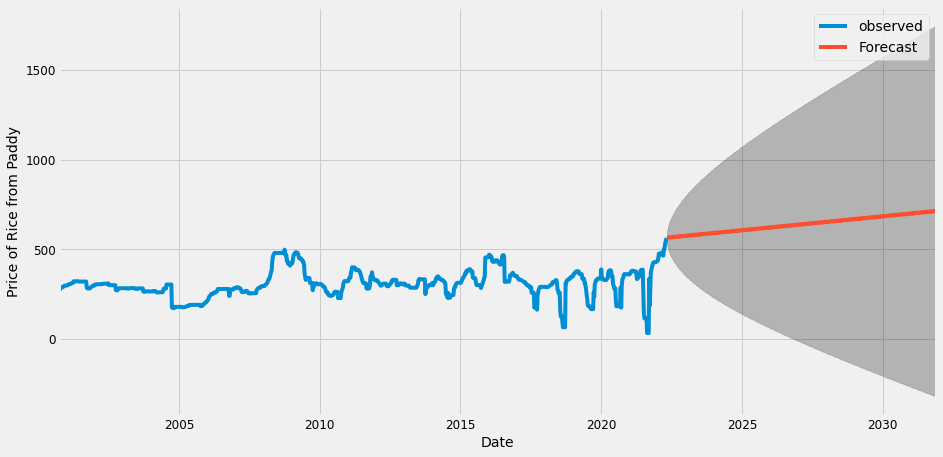

In [294]:
pred_uc = results.get_forecast(steps=500)
pred_ci = pred_uc.conf_int()
ax = paddypriceitaly.price.plot(label='observed', figsize=(14, 7))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Date')
ax.set_ylabel('Price of Rice from Paddy')
plt.legend()
plt.show()